In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
import xlrd

In [3]:
base_dir = os.path.split(os.path.split(os.getcwd())[0])[0]
os.chdir(os.path.join(base_dir, 'data\\elec_price'))
data = pd.read_excel('elec_prices.xlsx')
data_dereg = pd.read_excel('dereg_year.xlsx')
data_gentype = pd.read_excel('gen_prod_type.xls')

---

### 1. Dataset inspection and cleaning

In [396]:
data['date'] = data['Month'].astype(str) + '-' + data['Year'].astype(str)
data['date'] = pd.to_datetime(data['date'], format='%m-%Y')
data = data.drop(columns=['Year', 'Month'])
data = data.set_index('date')

data.index = pd.to_datetime(data.index)
data.index.name = None

In [397]:
data

,State,residential price,commercial price,industrial price,total price
2009-12-01,AK,16.27,14.06,13.42,14.76
2009-12-01,AL,9.82,9.91,6.49,8.66
2009-12-01,AR,8.64,7.58,5.9,7.41
2009-12-01,AZ,9.70,8.61,6.12,8.65
2009-12-01,CA,14.73,11.31,9.3,12.21
...,...,...,...,...,...
1990-01-01,VT,9.31,9.37,7.85,8.97
1990-01-01,WA,4.40,4.19,2.54,3.60
1990-01-01,WI,6.44,5.73,4.09,5.45
1990-01-01,WV,5.51,5.16,3.47,4.65


In [398]:
list_states = data['State'].unique()
state_dict_res , state_dict_com, state_dict_ind = {},{},{}
for state in list_states:
    state_dict_res[state] = np.array(data.loc[data['State'] == state, 'residential price'])
    state_dict_com[state] = np.array(data.loc[data['State'] == state, 'commercial price'])
    state_dict_ind[state] = np.array(data.loc[data['State'] == state, 'industrial price'])


In [399]:
data_residential = pd.DataFrame(state_dict_res , index=data.index.unique()).sort_index()
data_commercial = pd.DataFrame(state_dict_com , index=data.index.unique()).sort_index()
data_industrial = pd.DataFrame(state_dict_ind , index=data.index.unique()).sort_index()

In [400]:
data_residential

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
1990-01-01,9.62,5.96,7.06,7.83,9.68,6.81,9.42,5.62,7.36,7.68,...,6.39,5.68,6.26,7.02,6.35,9.31,4.40,6.44,5.51,5.63
1990-02-01,9.47,7.00,7.72,7.85,9.90,6.47,9.96,5.58,7.87,7.84,...,6.55,5.68,6.40,6.96,6.02,9.53,4.39,6.38,5.81,5.70
1990-03-01,9.55,6.18,7.85,8.18,9.97,6.75,9.70,5.34,7.89,7.79,...,6.60,5.69,6.84,7.08,6.83,9.47,4.42,6.57,5.78,5.83
1990-04-01,10.27,6.93,7.93,8.97,9.68,7.06,9.65,5.29,8.17,7.90,...,6.88,5.71,7.05,7.24,6.97,8.56,4.31,6.73,5.87,5.98
1990-05-01,10.27,6.52,8.43,9.37,9.97,7.27,10.04,5.26,8.58,7.83,...,7.24,5.73,7.63,7.30,7.79,8.89,4.31,6.68,6.00,6.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-08-01,17.09,10.91,9.43,11.29,15.93,10.40,20.22,14.72,14.31,12.25,...,9.25,9.20,12.15,9.20,10.91,15.07,7.86,12.28,7.94,9.26
2009-09-01,17.34,10.85,9.32,11.17,15.53,10.67,20.32,14.79,14.40,12.34,...,9.31,9.16,12.05,8.85,11.11,15.20,7.83,12.39,7.98,9.22
2009-10-01,16.85,10.40,9.29,10.97,13.85,10.51,20.57,14.28,14.70,12.34,...,9.01,9.25,11.97,8.35,10.84,15.37,7.73,12.00,8.30,8.98
2009-11-01,16.70,10.20,9.10,9.86,13.56,10.39,20.48,12.99,14.50,12.49,...,8.49,8.87,12.08,7.99,10.51,14.91,7.73,11.79,8.39,8.56


----

### 2. Deregulation year dataset

In [401]:
gb = data_dereg.groupby('year')
gb_list = [gb.get_group(x) for x in gb.groups]
dereg_dict = {}
for i in range(len(gb_list)):
    dereg_dict[gb_list[i].iloc[0,1]] = gb_list[i].iloc[:,0].values

dereg_dict


{1996: array(['RI'], dtype=object),
 1997: array(['IL', 'MT', 'NY'], dtype=object),
 1998: array(['CT', 'MA', 'MI', 'NH'], dtype=object),
 1999: array(['MD', 'NJ', 'NV', 'OH', 'PA', 'VA'], dtype=object),
 2000: array(['ME'], dtype=object),
 2002: array(['TX'], dtype=object)}

---

### 3. Generation by producer type data

In [402]:
data_gentype

,YEAR,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
0,1990,AK,Total Electric Power Industry,Total,5599506.0
1,1990,AK,Total Electric Power Industry,Coal,510573.0
2,1990,AK,Total Electric Power Industry,Hydroelectric Conventional,974521.0
3,1990,AK,Total Electric Power Industry,Natural Gas,3466261.0
4,1990,AK,Total Electric Power Industry,Petroleum,497116.0
...,...,...,...,...,...
60140,2022,WY,"Electric Generators, Electric Utilities",Coal,32414149.0
60141,2022,WY,"Electric Generators, Electric Utilities",Hydroelectric Conventional,734743.0
60142,2022,WY,"Electric Generators, Electric Utilities",Natural Gas,1022976.0
60143,2022,WY,"Electric Generators, Electric Utilities",Petroleum,52928.0


In [403]:
data_gentype.columns = ['year' , 'state' , 'type_of_producer' , 'energy_source', 'generation']
data_gentype['state'].unique()

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'US-TOTAL', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY', '  ',
       'US-Total'], dtype=object)

In [404]:
# remove US total data , state missing value data and DC data (as DC as many missing values)
data_gentype = data_gentype.loc[(data_gentype['state'] != 'US-TOTAL') & (data_gentype['state'] != 'US-Total') & (data_gentype['state'] != '  ') & (data_gentype['state'] != 'DC')]

In [405]:
# inspect what type of producers are in the data
data_gentype.loc[(data_gentype['state'] == 'CA') & (data_gentype['year'] == 2020) & (data_gentype['energy_source'] == 'Total')]

,year,state,type_of_producer,energy_source,generation
53902,2020,CA,Total Electric Power Industry,Total,193083537.0
53916,2020,CA,"Combined Heat and Power, Industrial Power",Total,13713500.0
53926,2020,CA,"Combined Heat and Power, Commercial Power",Total,2505739.0
53935,2020,CA,"Combined Heat and Power, Electric Power",Total,12081197.0
53943,2020,CA,"Electric Generators, Independent Power Producers",Total,96891648.0
53953,2020,CA,"Electric Generators, Electric Utilities",Total,67891454.0


In [406]:
# Separate the data into two dataframes - one for electric utilities and one for independent power producers
data_total_raw = data_gentype.loc[(data_gentype['type_of_producer'] == 'Total Electric Power Industry') & (data_gentype['energy_source'] == 'Total')]
data_util_raw = data_gentype.loc[(data_gentype['type_of_producer'] == 'Electric Generators, Electric Utilities') & (data_gentype['energy_source'] == 'Total')]
data_ind_raw = data_gentype.loc[(data_gentype['type_of_producer'] == 'Electric Generators, Independent Power Producers') & (data_gentype['energy_source'] == 'Total')]

data_util_raw = data_util_raw.drop(columns = ['type_of_producer' , 'energy_source'])
data_ind_raw = data_ind_raw.drop(columns = ['type_of_producer' , 'energy_source'])

data_util_raw = data_util_raw.sort_index().reset_index(drop=True)
data_ind_raw = data_ind_raw.sort_index().reset_index(drop=True)


state_list = data_gentype['state'].unique()
dict_util = {}
dict_ind =  {}
dict_total = {}

for state in state_list:
    dict_util[state] = np.array(data_util_raw.loc[data_util_raw['state'] == state, 'generation'])
    dict_ind[state] = np.array(data_ind_raw.loc[data_ind_raw['state'] == state, 'generation'])
    dict_total[state] = np.array(data_total_raw.loc[data_total_raw['state'] == state, 'generation'])




In [407]:
# Check for missing values in the total electrcity generation data
no_missing = True
for key in dict_total.keys():
    if len(dict_total[key]) != 33:
        no_missing = False
        print(key)
print ('Data has no missing values:' , no_missing)

Data has no missing values: True


In [408]:
# Check for missing values in the utilities data

for key in dict_util.keys():
    if len(dict_util[key]) != 33:
        print(key)

print(len(dict_util['ME']), len(dict_util['RI']))

#Find year missing in raw dataset and replace missing value with the same value from the previous year
print (data_util_raw.loc[data_util_raw['state'] == 'ME'] , "\n",  data_util_raw.loc[data_util_raw['state'] == 'RI'] , "\n")
print (data_util_raw.loc[data_util_raw['year'] == 2001])

inds = data_util_raw.loc[(data_util_raw['state'] == 'MD') & (data_util_raw['year'] == 2001)].index , data_util_raw.loc[(data_util_raw['state'] == 'PA') & (data_util_raw['year'] == 2001)].index
inds

ME
RI
32 32
      year state  generation
20    1990    ME   9063595.0
70    1991    ME   9518506.0
120   1992    ME   8334852.0
170   1993    ME   8075919.0
220   1994    ME   9015544.0
270   1995    ME   2668381.0
320   1996    ME   7800149.0
370   1997    ME   3222785.0
420   1998    ME   3549008.0
470   1999    ME   1189273.0
520   2000    ME      2781.0
618   2002    ME       865.0
668   2003    ME      1409.0
718   2004    ME      1121.0
768   2005    ME       827.0
818   2006    ME       489.0
868   2007    ME      1317.0
918   2008    ME      1080.0
968   2009    ME       867.0
1018  2010    ME      1759.0
1068  2011    ME       754.0
1118  2012    ME       168.0
1168  2013    ME       597.0
1218  2014    ME       523.0
1268  2015    ME        84.0
1318  2016    ME        32.0
1368  2017    ME        86.0
1418  2018    ME        19.0
1468  2019    ME      3791.0
1518  2020    ME      2914.0
1568  2021    ME      1503.0
1618  2022    ME       910.0 
       year state  generation


(Index([569], dtype='int64'), Index([586], dtype='int64'))

In [409]:
line1 = pd.DataFrame({"year": 2001, "state": 'ME' , 'generation': data_util_raw.loc[(data_util_raw['state'] == 'ME') & (data_util_raw['year'] == 2000) , 'generation'].values[0]}, index=[569.5])
line2 = pd.DataFrame({"year": 2001, "state": 'RI' , 'generation': data_util_raw.loc[(data_util_raw['state'] == 'RI') & (data_util_raw['year'] == 2000) , 'generation'].values[0]}, index=[586.5])

data_top = data_util_raw.iloc[:inds[0][0]+1,:]
data_bottom = data_util_raw.iloc[inds[0][0]+1:,:]
data_util_raw = pd.concat([data_top, line1, data_bottom] , ignore_index=False)


data_top = data_util_raw.iloc[:inds[1][0]+1,:]
data_bottom = data_util_raw.iloc[inds[1][0]+1:,:]
data_util_raw = pd.concat([data_top, line2, data_bottom] , ignore_index=False)


data_util_raw = data_util_raw.sort_index().reset_index(drop=True)
for state in state_list:
    dict_util[state] = np.array(data_util_raw.loc[data_util_raw['state'] == state, 'generation'])

In [410]:
#Check for missing values in the independent power producers data
list1 = []

for key in dict_ind.keys():
    if len(dict_ind[key]) != 33:
        list1.append(key)
        print(key , len(dict_ind[key]))

AK 15
AR 31
AZ 22
DE 23
IN 28
KY 25
MO 22
MS 30
ND 20
NE 14
NM 23
OH 30
OK 22
SD 20
TN 31
WY 25


As independent providers entered different states in different years, we need to check whether we're dealing with actual missing values or simply with the years before independent suppliers entered. In case it's the latter, we simply add zeros for the missing years.

In [411]:
missing_states = []
for item in list1:
    temp = data_ind_raw.loc[data_ind_raw['state'] == item].sort_index().reset_index(drop=True)
    for i in range(len(temp)-1):
        if temp.loc[i+1,'year'] != (temp.loc[i,'year'] + 1):
           missing_states.append(item) 
           break

missing_states

['AK', 'OH']

Except for Alaska and Ohio, we can easily append zeros to all years prior to the first year with data. These two states however we'll need to inspect individually.

In [412]:
for state in list1:
    if state in missing_states:
        continue
    else:
        while len(dict_ind[state]) < 33:
            dict_ind[state] = np.insert(dict_ind[state],0,0)

In [413]:
print (data_ind_raw.loc[data_ind_raw['state'] == 'AK'] , "\n",  data_ind_raw.loc[data_ind_raw['state'] == 'OH'])

      year state  generation
468   2002    AK         0.0
707   2007    AK     80133.0
853   2010    AK         0.0
903   2011    AK         0.0
953   2012    AK     18124.0
1003  2013    AK     46384.0
1053  2014    AK     52313.0
1103  2015    AK     54562.0
1153  2016    AK     60468.0
1203  2017    AK     50322.0
1253  2018    AK     56327.0
1303  2019    AK     55971.0
1353  2020    AK     53831.0
1403  2021    AK     45413.0
1453  2022    AK     58398.0 
       year state    generation
23    1990    OH  8.813000e+03
58    1991    OH  8.813000e+03
94    1992    OH  8.813000e+03
132   1993    OH  6.544000e+03
170   1994    OH  2.950000e+03
209   1995    OH  4.762000e+03
248   1996    OH  4.880000e+03
408   2000    OH  3.156853e+06
453   2001    OH  5.242389e+06
500   2002    OH  6.421090e+06
547   2003    OH  6.123786e+06
595   2004    OH  4.699059e+06
643   2005    OH  5.281725e+07
691   2006    OH  5.583570e+07
740   2007    OH  5.336576e+07
788   2008    OH  5.364620e+07
837   2

In [414]:
# Alaska we drop for now and maybe try to deal with later
# For Ohio we're missing the years 1997-1999. It's likely that these missing years are simply years with zero independent generation as with the other states. 
# To verify that, we calculate the electricity generated by independent power producers for these years by subtracting the electricity generated 
# by all other sources from the total electricity generated (because we do see in that data that Ohio did have independent power producers prior to 1997)

ohio_missing = []
data_ohio = data_gentype.loc[(data_gentype['state'] == 'OH') & (data_gentype['energy_source'] == 'Total') & (data_gentype['year'] >= 1997) & (data_gentype['year'] <= 1999)] 
for year in data_ohio['year'].unique():
    yearly_total = data_ohio.loc[(data_ohio['year'] == year) & (data_ohio['type_of_producer'] == 'Total Electric Power Industry') , 'generation'].values[0]
    yearly_others = sum (data_ohio.loc[(data_ohio['year'] == year) & (data_ohio['type_of_producer'] != 'Total Electric Power Industry') , 'generation'].values)
    yearly_ind = yearly_total - yearly_others
    ohio_missing.append(yearly_ind)

ohio_missing

[0.0, 0.0, 0.0]

In [415]:
for index in range (7,10):
    dict_ind['OH'] = np.insert(dict_ind['OH'],index,0)

## Check for improvement of the code
for index in range (0,12):
    dict_ind['AK'] = np.insert(dict_ind['AK'],index,0)
for index in range (13,17):
    dict_ind['AK'] = np.insert(dict_ind['AK'],index,0)
for index in range (18,20):
    dict_ind['AK'] = np.insert(dict_ind['AK'],index,0)

In [416]:
data_util = pd.DataFrame(dict_util , index=data_util_raw['year'].unique()).sort_index()
data_ind = pd.DataFrame(dict_ind , index=data_ind_raw['year'].unique()).sort_index()
data_total = pd.DataFrame(dict_total , index=data_total_raw['year'].unique()).sort_index()

# Change util and ind and datasets to proportations of total generation

data_util = data_util/data_total
data_ind = data_ind/data_total

---

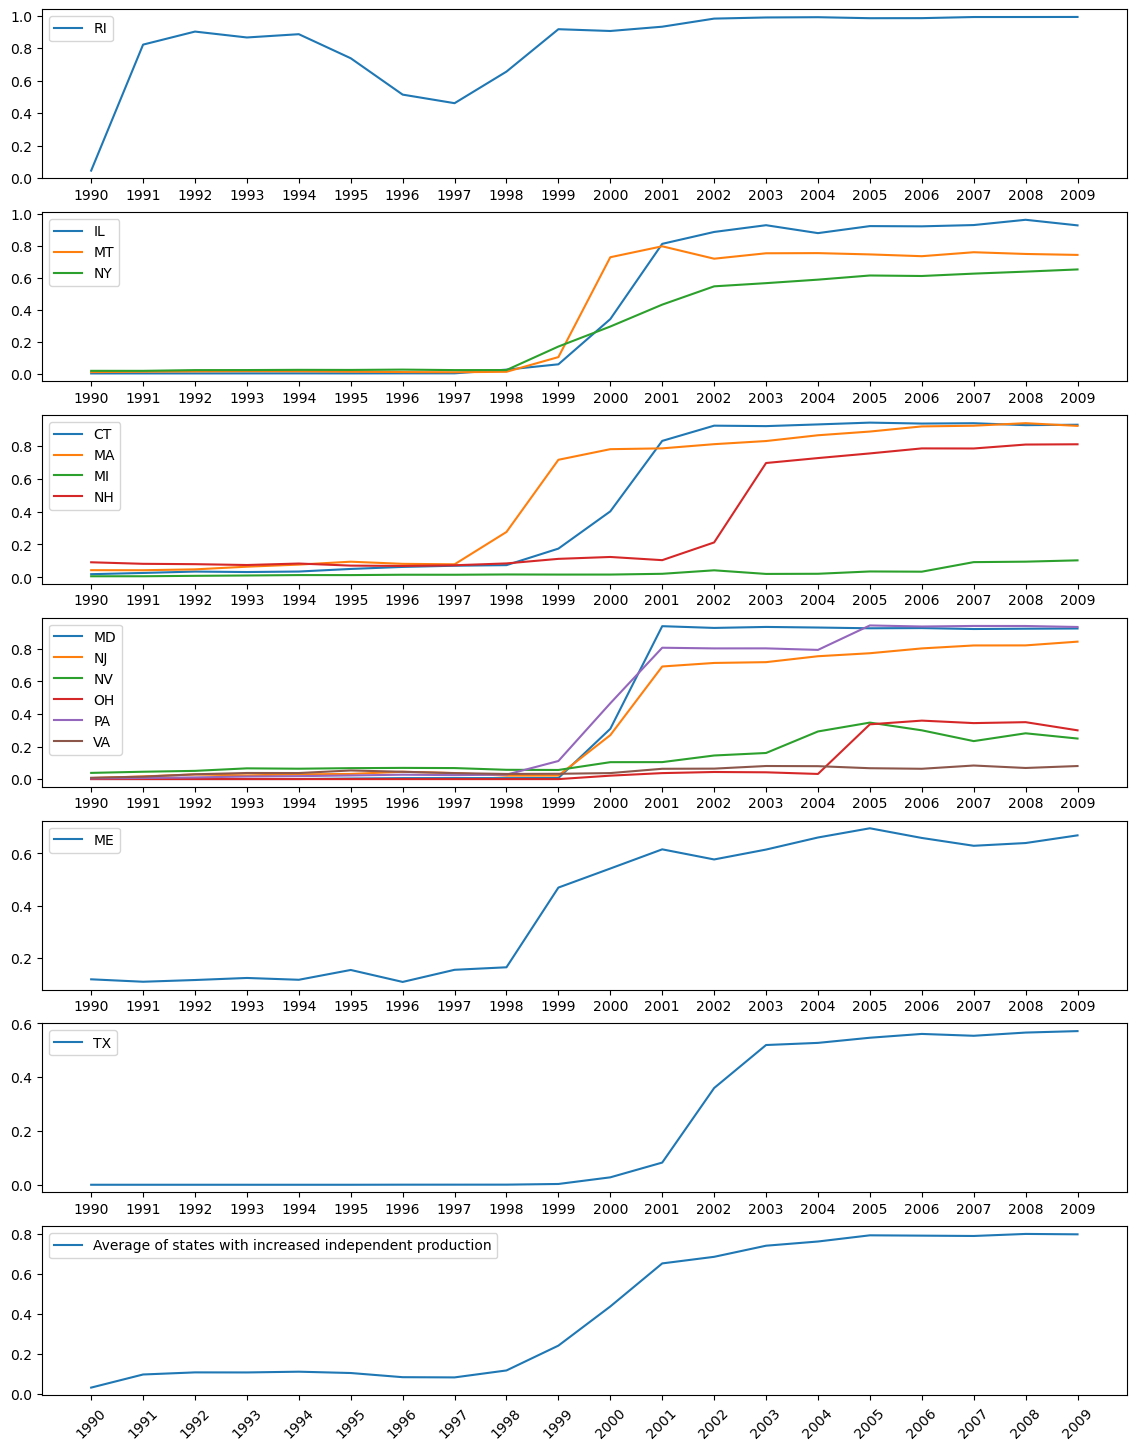

In [452]:
fig, ax = plt.subplots(len(dereg_dict.keys()) + 1 , 1 ,figsize=(14,18))
list_color = ['b','g','r','c','m','y']
i = 0
for year in dereg_dict.keys():
    color = list_color[i]
    for state in dereg_dict[year]:
        ax[i].plot(data_ind.index[0:20], data_ind[state][0:20], label=state)
        ax[i].set_xticks(data_ind.index[0:20])
        ax[i].legend()
    i += 1

#Plot the average of the relevant states who saw a jump in independent production around 1998-2000
ind_states = []
for year in dereg_dict.keys():
    for state in dereg_dict[year]:
        ind_states.append(state)
to_remove = ['TX','OH','VA','MI']
for item in to_remove:
    ind_states.remove(item)
df_ind_states = data_ind.loc[:,ind_states]
mean = df_ind_states.mean(axis=1)
ax[i].plot(data_ind.index[0:20], mean[0:20], label='Average of states with increased independent production')
ax[i].set_xticks(data_ind.index[0:20])
ax[i].legend()

plt.xticks(rotation=45)
plt.show()
    

In [35]:
### Old partition - based on the paper
lib_states = ['CA' , 'OR' , 'NV', 'AZ', 'NM', 'MT', 'TX', 'OK', 'AR' , 'IL', 'MI', 'OH', 'VA', 'MD', 'DE', 'NJ', 'NY', 'CT', 'MA', 'NH' , 'ME']
unlib_states = ['FL', 'GA', 'AL', 'MS', 'LA', 'SC', 'NC', 'TN', 'KY', 'UT', 'CO', 'KS', 'MO', 'ID', 'WY', 'ND', 'SD', 'NE', 'WA']

data_res_lib = data_residential[lib_states].loc['1994-01-01': '2002-01-01']
data_res_unlib = data_residential[unlib_states].loc['1994-01-01': '2002-01-01']


In [14]:
 ### New partition for 1998
lib_states = ['CA' , 'CT', 'OH', 'OR', 'IL', 'MA',  'MI', 'NH', 'NY', 'PA', 'RI']
unlib_states = ['AR','AZ','DE', 'FL', 'GA', 'AL', 'MS','ME', 'LA', 'SC','MD','MT', 'OK', 'NC','NJ', 'NM','NV', 'TN', 'KY', 'UT', 'CO', 'KS', 'MO', 'ID', 'WY', 'ND', 'SD', 'NE', 'TX','VA', 'WA']

data_res_lib = data_residential[lib_states].loc['1994-01-01': '2002-01-01']
data_res_unlib = data_residential[unlib_states].loc['1994-01-01': '2002-01-01']

In [453]:
dereg_dict

{1996: array(['RI'], dtype=object),
 1997: array(['IL', 'MT', 'NY'], dtype=object),
 1998: array(['CT', 'MA', 'MI', 'NH'], dtype=object),
 1999: array(['MD', 'NJ', 'NV', 'OH', 'PA', 'VA'], dtype=object),
 2000: array(['ME'], dtype=object),
 2002: array(['TX'], dtype=object)}

In [471]:
 ### New partition based on data
lib_states = ['CA' , 'CT', 'IL', 'MA', 'MT', 'NH','NJ', 'NY', 'PA', 'RI']
unlib_states = ['AR','AZ','DE', 'FL', 'GA', 'AL', 'MI', 'MS','ME', 'LA', 'OH', 'OR', 'SC','MD', 'OK', 'NC', 'NM','NV', 'TN', 'KY', 'UT', 'CO', 'KS', 'MO', 'ID', 'WY', 'ND', 'SD', 'NE', 'TX','VA', 'WA']

data_res_lib = data_residential[lib_states].loc['1992-01-01': '2002-01-01']
data_res_unlib = data_residential[unlib_states].loc['1992-01-01': '2002-01-01']

In [472]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
res_lib = scaler.fit_transform(data_res_lib)
res_unlib = scaler.fit_transform(data_res_unlib)
lib_mean = np.mean(res_lib, axis=1)
unlib_mean = np.mean(res_unlib, axis=1)
unlib_mean = unlib_mean + 0.5



In [473]:
dates = data_res_lib.index.date

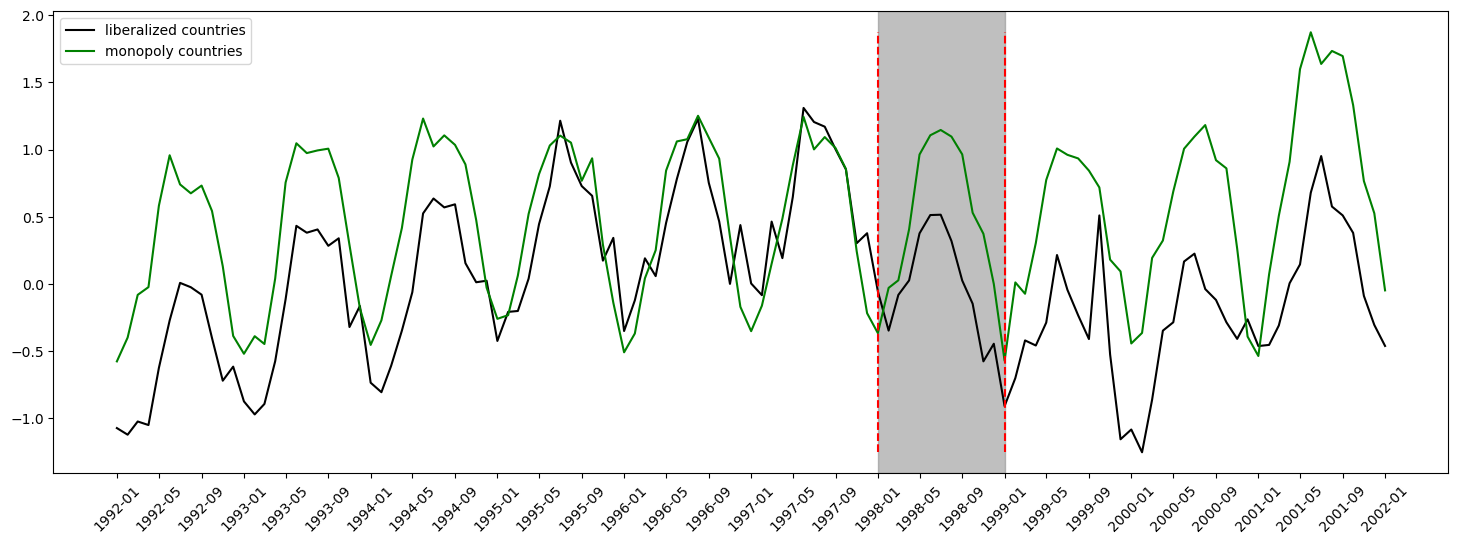

In [474]:
import datetime
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(18,6))

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

ax.plot(dates, lib_mean , color = 'black', label = 'liberalized countries')
ax.plot(dates , unlib_mean , color = 'green' , label = 'monopoly countries')
ax.set_xticks(dates[::4])
plt.xticks(rotation=45)

ax.vlines(x=datetime.datetime(1999,1,1), ymin = np.min(lib_mean), ymax = np.max(unlib_mean) , color='red', linestyle='--')
ax.vlines(x=datetime.datetime(1998,1,1), ymin = np.min(lib_mean), ymax = np.max(unlib_mean) , color='red', linestyle='--')
ax.axvspan(datetime.datetime(1998,1,1), datetime.datetime(1999,1,1), color='grey', alpha=0.5)
plt.legend()
plt.show()

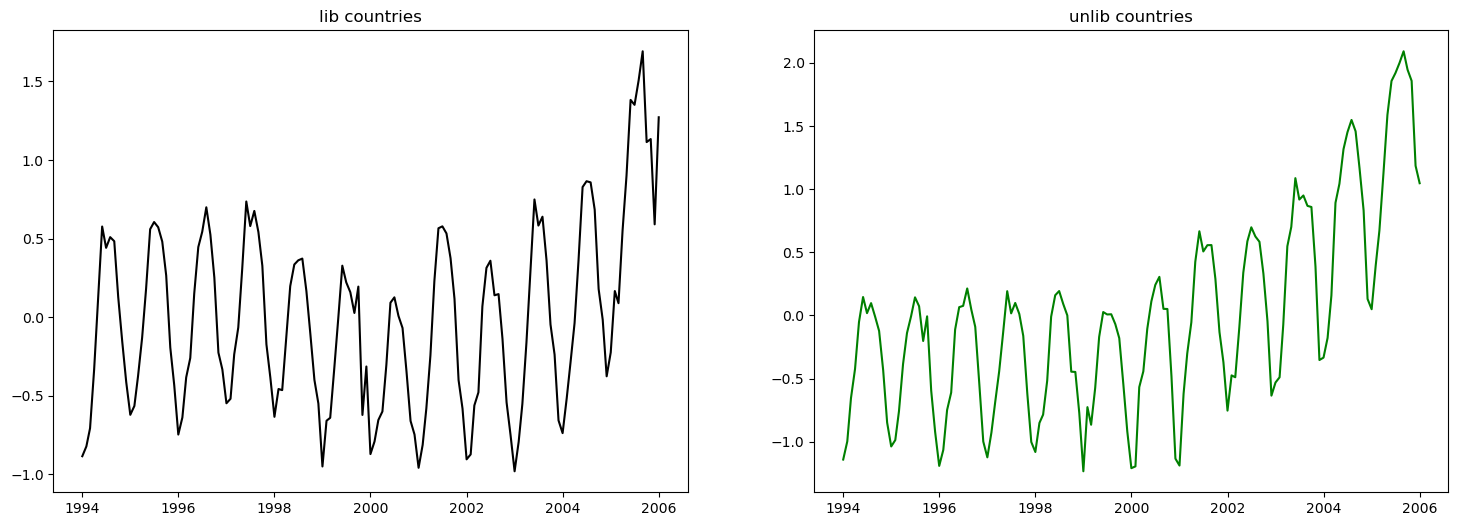

In [31]:
fig, ax = plt.subplots(1,2 ,figsize = (18,6))
ax[0].plot(data_res_lib.index , lib_mean , color = 'black', label = 'lib countries')
ax[1].plot(data_res_unlib.index , unlib_mean , color = 'green' , label = 'unlib countries')

ax[0].set_title('lib countries')
ax[1].set_title('unlib countries')

plt.show()